# Classifying movie reviews with simple neural network

As a first example of Keras utilisation, we are aiming to solve a simple classification Problem. This first neural network will have only a small number of layers. We are only trying to get a better understanding of Keras Syntax

In [82]:
from keras.datasets import imdb

The IMDB dataset is a set of reviews from the Internet Movie Database. It contains a set of 50000 reviews, split into 25000 reviews for training and 25000 for testing. As a package coming with Keras it has already been preprocessed. The reviews have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.  

In [83]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [84]:
train_labels[1]

0

We have restricted ourselves to the 10000 most frequent words. This alllows us to work with vector data of manageable size. So no word index can exceed 10000
Which We can verify this easily with this simple line of code:

In [85]:
max([max(sequence) for sequence in train_data])

9999

Here is a code snippet to decode one of the integer reviews back to English words :

In [86]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decode_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

### Preparing the data

In [87]:
import numpy as np

To feed our data into the neural network we first have to turn our lists of integers into tensors.

In the next cell we one_hot encode our lists to turn them  into vectors of 0s and 1s (this is not the only solution but the most convenient for now)

In [88]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [89]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [90]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Implementing the three layer network

In [91]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

A dense layer with a Relu activation function consists of the operation : **output = relu(dot(W, input) + b)**

### Compiling the model

In [92]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

### Validation

In [93]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Training the model

In [94]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size = 512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 86us/step - loss: 0.5597 - binary_accuracy: 0.7709 - val_loss: 0.4371 - val_binary_accuracy: 0.8643
Epoch 2/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.3570 - binary_accuracy: 0.8931 - val_loss: 0.3372 - val_binary_accuracy: 0.8844
Epoch 3/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.2578 - binary_accuracy: 0.9223 - val_loss: 0.2960 - val_binary_accuracy: 0.8890
Epoch 4/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.1979 - binary_accuracy: 0.9385 - val_loss: 0.3122 - val_binary_accuracy: 0.8744
Epoch 5/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.1574 - binary_accuracy: 0.9530 - val_loss: 0.2768 - val_binary_accuracy: 0.8883
Epoch 6/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.1313 - binary_accuracy: 0.9608 - val_loss: 0.3100 - val_binary_a

In [95]:
history_dict = history.history

In [96]:
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

*Let's use matplotlib to plot training and validation loss*

In [97]:
import matplotlib.pyplot as plt

def plot_loss(history_dict):
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range(1, len(loss_values)+1)

    plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()



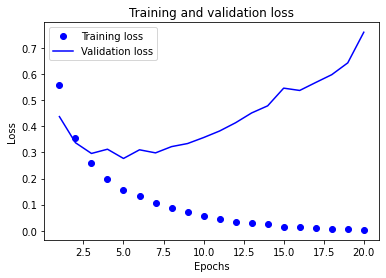

In [98]:
plot_loss(history_dict)

*Let's then plot training and validation accuracy*

In [123]:
def plot_acc(history_dict, epochs = 20):
    
    acc_values = history_dict['binary_accuracy']
    val_acc_values = history_dict['val_binary_accuracy']

    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()

    plt.show()

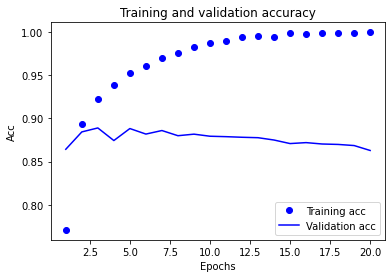

In [100]:
plot_acc(history_dict)

We see that as expected the training accuracy increases with every epoch and the training loss decreases.
But it is not the case for the validation accuracy that only decreases compting from the fourth epoch. 
We are in front of a case of overfitting


We are interested only on the Model trained on four epochs as it is the one that gives the best accuracy

## Retraining a model from scratch

In [101]:


model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size=512)

results = model.evaluate(x_test, y_test)


Epoch 1/4
25000/25000 [==============================] - 1s 43us/step - loss: 0.4624 - accuracy: 0.8072
Epoch 2/4
25000/25000 [==============================] - 1s 40us/step - loss: 0.2537 - accuracy: 0.9133
Epoch 3/4
25000/25000 [==============================] - 1s 39us/step - loss: 0.1981 - accuracy: 0.9298
Epoch 4/4
25000/25000 [==============================] - 1s 55us/step


### Using a trained neural network to generate predictions

In [102]:
model.predict(x_test)

array([[0.13721722],
       [0.9983045 ],
       [0.67022884],
       ...,
       [0.10779873],
       [0.06173444],
       [0.58211577]], dtype=float32)

## Attempts to train a model with better accuracy

### Model with 1 hidden layer

Model with 16  layers
25000/25000 [==============================] - 1s 37us/step


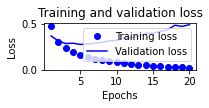

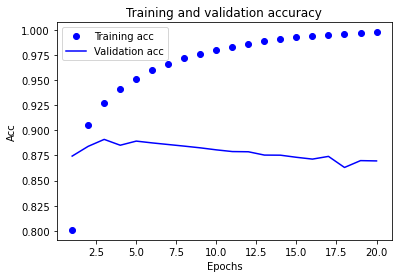

Model with 32  layers
25000/25000 [==============================] - 1s 45us/step


<ipython-input-103-56f1a225e8b9>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_subplot(4, 2, i+1)


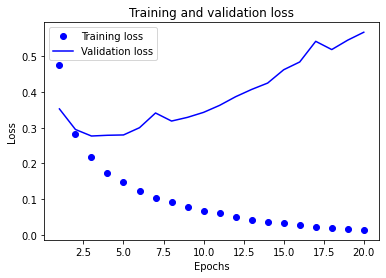

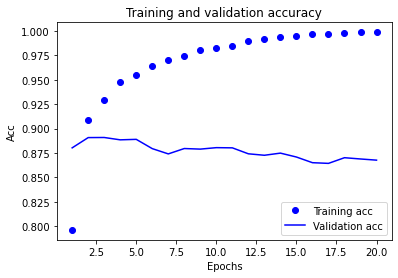

Model with 48  layers
25000/25000 [==============================] - 1s 49us/step


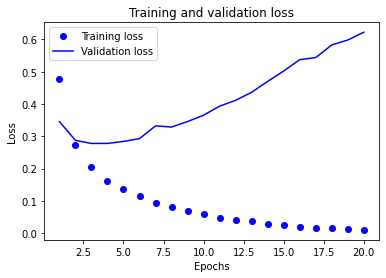

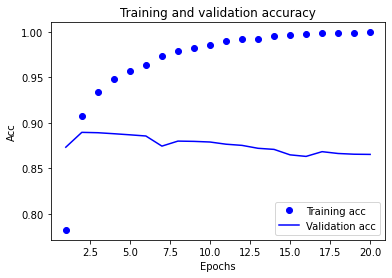

Model with 64  layers
25000/25000 [==============================] - 1s 52us/step


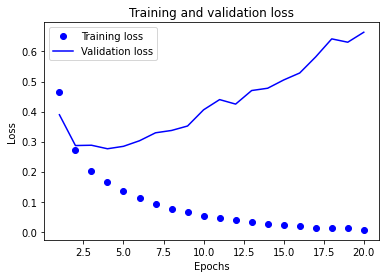

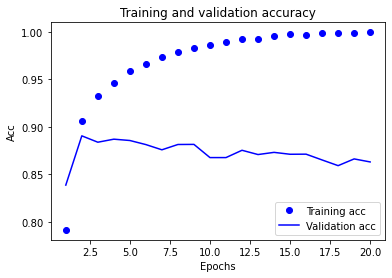

In [103]:
fig = plt.figure()
history = []

for i in range(4):
    print("Model with", 16*(i+1), " layers")
    model = models.Sequential()
    model.add(layers.Dense(16*(i+1), activation = 'relu', input_shape = (10000,)))
    model.add(layers.Dense(1, activation = 'sigmoid'))

    model.compile(optimizer='rmsprop', loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

    history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val), verbose = False)

    results = model.evaluate(x_test, y_test)
    
    history_dict = history.history
    
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range(1, len(loss_values)+1)
    
    fig.add_subplot(4, 2, i+1)
    plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    fig.add_subplot(4, 2, i+2)
    acc_values = history_dict['binary_accuracy']
    val_acc_values = history_dict['val_binary_accuracy']

    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()

    plt.show()
    
    
    
    


We see that with one hidden layer, augmenting the number of units doesn't necessarily result in better accuracy

### Model with 3 hidden layers

Model with 16  units in first layer 
And  16  in second layer
25000/25000 [==============================] - 1s 40us/step


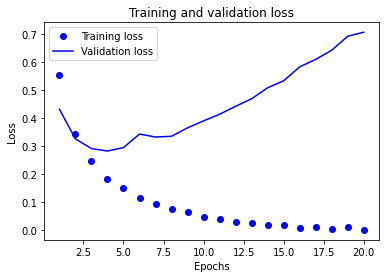

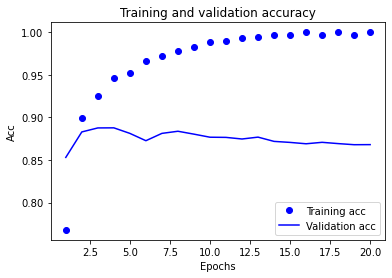

Model with 16  units in first layer 
And  32  in second layer
25000/25000 [==============================] - 1s 46us/step


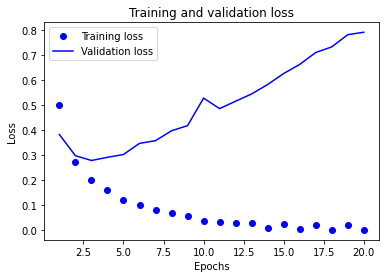

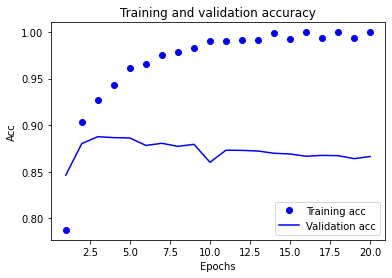

Model with 16  units in first layer 
And  48  in second layer
25000/25000 [==============================] - 1s 42us/step


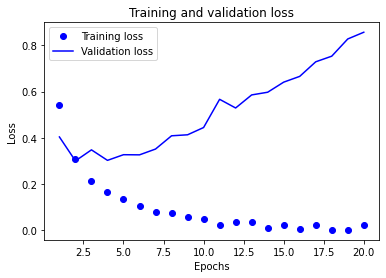

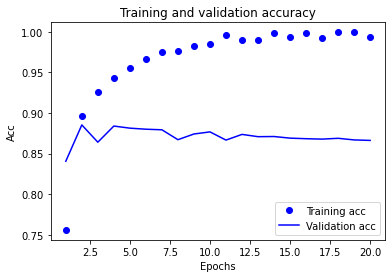

Model with 16  units in first layer 
And  64  in second layer
25000/25000 [==============================] - 1s 45us/step


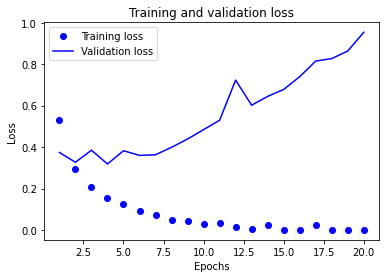

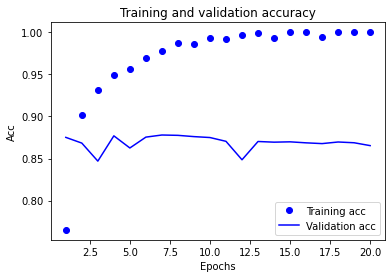

Model with 32  units in first layer 
And  16  in second layer
25000/25000 [==============================] - 1s 46us/step


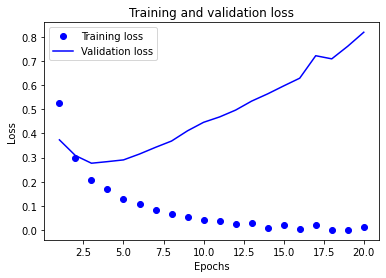

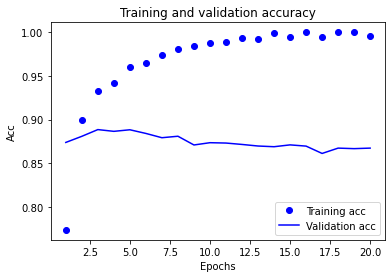

Model with 32  units in first layer 
And  32  in second layer
25000/25000 [==============================] - 1s 49us/step


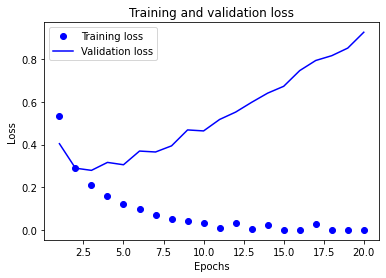

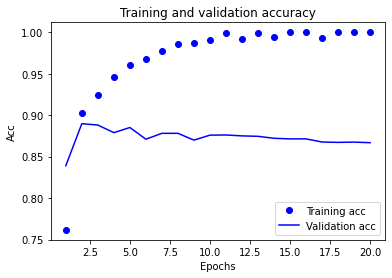

Model with 32  units in first layer 
And  48  in second layer
25000/25000 [==============================] - 1s 46us/step


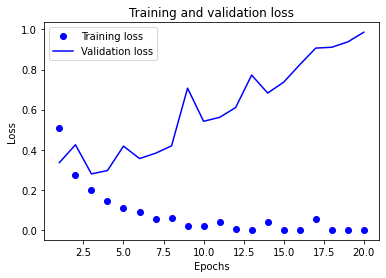

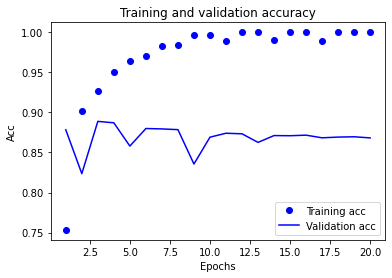

Model with 32  units in first layer 
And  64  in second layer
25000/25000 [==============================] - 1s 46us/step


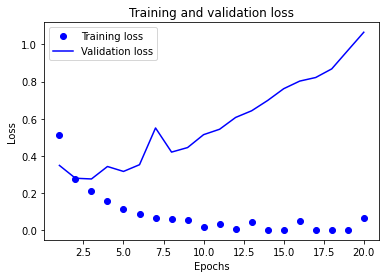

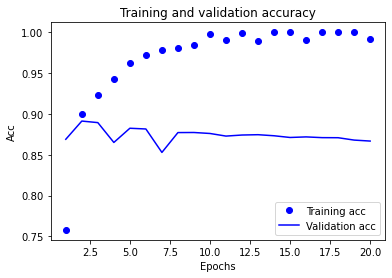

Model with 48  units in first layer 
And  16  in second layer
25000/25000 [==============================] - 1s 48us/step


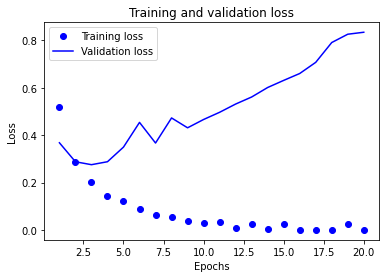

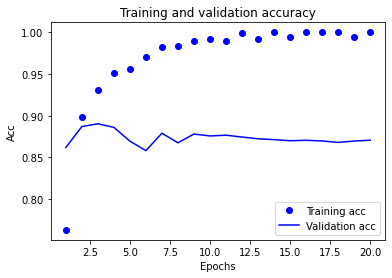

Model with 48  units in first layer 
And  32  in second layer
25000/25000 [==============================] - 1s 50us/step


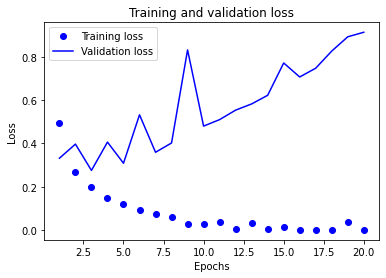

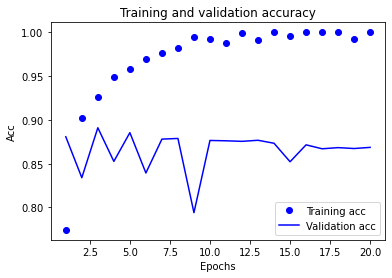

Model with 48  units in first layer 
And  48  in second layer
25000/25000 [==============================] - 1s 47us/step


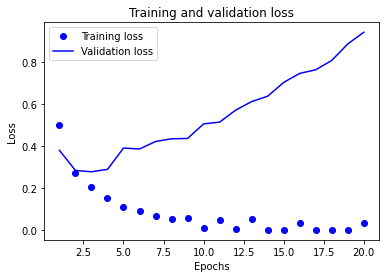

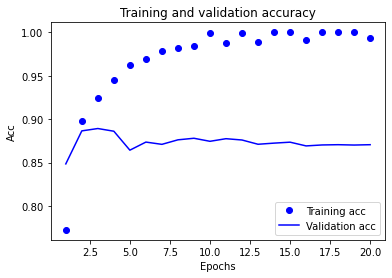

Model with 48  units in first layer 
And  64  in second layer
25000/25000 [==============================] - 1s 48us/step


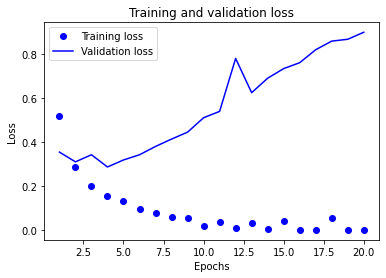

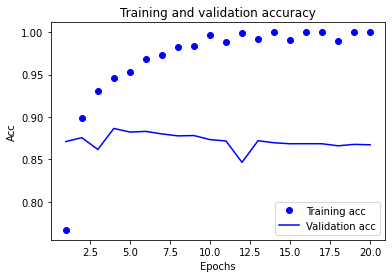

Model with 64  units in first layer 
And  16  in second layer
25000/25000 [==============================] - 1s 55us/step


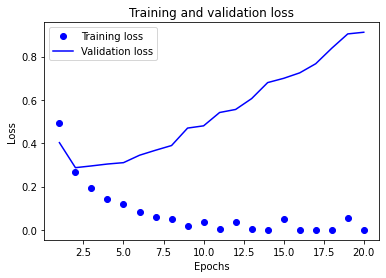

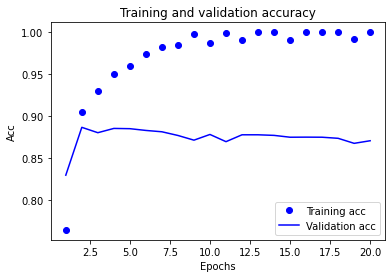

Model with 64  units in first layer 
And  32  in second layer
25000/25000 [==============================] - 1s 56us/step


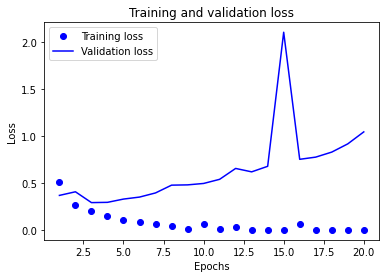

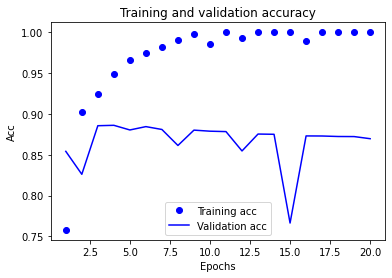

Model with 64  units in first layer 
And  48  in second layer
25000/25000 [==============================] - 1s 57us/step


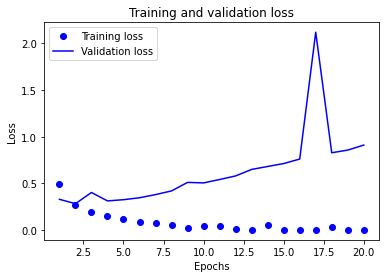

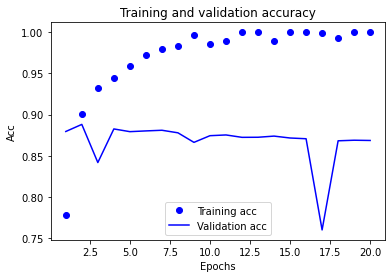

Model with 64  units in first layer 
And  64  in second layer
25000/25000 [==============================] - 1s 56us/step


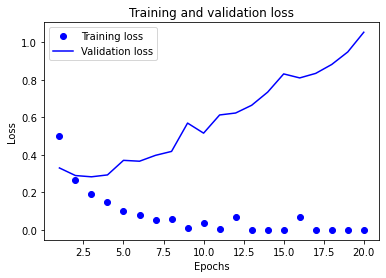

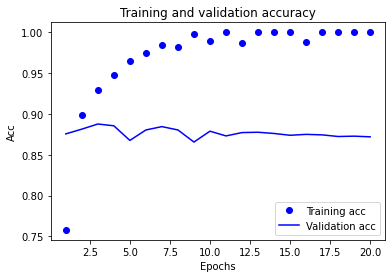

In [104]:
fig = plt.figure()
history = []

for i in range(4):
    for j in range(4):
        print("Model with", 16*(i+1), " units in first layer \nAnd ", 16*(j+1), " in second layer")
        model = models.Sequential()
        model.add(layers.Dense(16*(i+1), activation = 'relu', input_shape = (10000,)))
        model.add(layers.Dense(16*(j+1), activation='relu'))
        model.add(layers.Dense(16, activation='relu'))
        model.add(layers.Dense(1, activation = 'sigmoid'))

        model.compile(optimizer='rmsprop', loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

        history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val), verbose = False)

        results = model.evaluate(x_test, y_test)

        history_dict = history.history

        loss_values = history_dict['loss']
        val_loss_values = history_dict['val_loss']

        epochs = range(1, len(loss_values)+1)

        plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
        plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
        plt.title('Training and validation loss')

        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        acc_values = history_dict['binary_accuracy']
        val_acc_values = history_dict['val_binary_accuracy']

        plt.plot(epochs, acc_values, 'bo', label='Training acc')
        plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
        plt.title('Training and validation accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Acc')
        plt.legend()

        plt.show()

It seems that the model constantly overfits.

## Impact of changing the loss function on the performance of the model

First we retrain the model from scratch changing the loss function for mse instead of binary_crossentropy. 

We retrain the model with three hidden layers and 16 units on each layers for 4 epochs as it seems it is the one that performs best

In [125]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=[metrics.binary_accuracy], )

history = model.fit(x_train, y_train, epochs = 4, batch_size=512)

results = model.evaluate(x_test, y_test)


Epoch 1/4
25000/25000 [==============================] - 1s 39us/step - loss: 0.1423 - binary_accuracy: 0.8214
Epoch 2/4
25000/25000 [==============================] - 1s 36us/step - loss: 0.0747 - binary_accuracy: 0.9111
Epoch 3/4
25000/25000 [==============================] - 1s 37us/step - loss: 0.0563 - binary_accuracy: 0.9332
Epoch 4/4
25000/25000 [==============================] - 1s 43us/step


In [126]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=[metrics.binary_accuracy], )

history = model.fit(x_train, y_train, epochs = 4, batch_size=512)

results = model.evaluate(x_test, y_test)


Epoch 1/4
25000/25000 [==============================] - 1s 40us/step - loss: 0.4540 - binary_accuracy: 0.8205
Epoch 2/4
25000/25000 [==============================] - 1s 38us/step - loss: 0.2602 - binary_accuracy: 0.9090
Epoch 3/4
25000/25000 [==============================] - 1s 36us/step - loss: 0.1993 - binary_accuracy: 0.9286
Epoch 4/4
25000/25000 [==============================] - 1s 43us/step
